In [51]:
# imports
import pandas as pd
import numpy as np
import pathlib
import cv2
import matplotlib.pyplot as plt
from typing import List, Tuple
%matplotlib inline


In [54]:
# variables & constants
PATH_BASE = pathlib.Path("__file__").parents[0]
PATH_TRAIN_IMAGE_FOLDER = PATH_BASE.joinpath("data","train")
PATH_TRAIN_METADATA = PATH_BASE.joinpath("data","train.csv")

INPUT_IMG_SHAPE = (520, 704) # height, weight for raw train images

In [71]:
# funcs
def get_image_paths(path: pathlib.Path) -> List[pathlib.Path]:
    """
    Function to Combine Directory Path with individual Image Paths
    """

    image_paths = []
    for filepath in path.iterdir():
        image_paths.append(filepath)
    return image_paths

def get_image_and_reshape(path_single_image: pathlib, image_shape: Tuple[int, int]) -> np.ndarray:
    """Function to load image and reshape to desired shape"""

    image=cv2.imread(str(path_single_image), cv2.IMREAD_GRAYSCALE) #cv2 imread takes only str
    return image.reshape(*image_shape, 1)


def plot_multiple_img(images: List[np.ndarray], rows: int, cols: int) -> None:
    """
    Display images from dataset.
    """
    
    _, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,8))
    for ind, image in enumerate(images):        
            ax.ravel()[ind].imshow(image)
            ax.ravel()[ind].set_axis_off()
    plt.tight_layout()
    plt.show()



In [12]:
# read data
train_metadata = pd.read_csv(PATH_TRAIN_METADATA)
train_metadata.head(2)

,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
0,0030fd0e6378,118145 6 118849 7 119553 8 120257 8 120961 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
1,0030fd0e6378,189036 1 189739 3 190441 6 191144 7 191848 8 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00


In [30]:
# Explore the metadata
print(f"Shape of the train meta-data is: {train_metadata.shape}")
print(f"There is the following missing data: \n{train_metadata.isnull().sum()}")
print(f"Number of unique images: {train_metadata.id.nunique()}")
print(f"These are the cell types in the data: {list(train_metadata.cell_type.unique())}")

Shape of the train meta-data is: (73585, 9)
There is the following missing data: 
id                   0
annotation           0
width                0
height               0
cell_type            0
plate_time           0
sample_date          0
sample_id            0
elapsed_timedelta    0
dtype: int64
Number of unique images: 606
These are the cell types in the data: ['shsy5y', 'astro', 'cort']


In [31]:
# Explore the metadata in respect to the images (height and width)
train_metadata[["height", "width"]].describe()

,height,width
count,73585.0,73585.0
mean,520.0,704.0
std,0.0,0.0
min,520.0,704.0
25%,520.0,704.0
50%,520.0,704.0
75%,520.0,704.0
max,520.0,704.0


In [33]:
# Number of annotations per image
train_metadata.groupby("id")[["annotation"]].count().sort_values("annotation")

,annotation
id,
e92c56871769,4
eec79772cb99,5
b861811eaff6,5
c25db38e918e,6
7f21996da2e6,8
...,...
e8ae919aa92e,605
aff8fb4fc364,609
e748ac1c469b,703


Explore the images by loading them and displaying without and with the annotations

In [69]:
## load all train images into memory as List[np.ndarray]
train_images_paths = get_image_paths(PATH_TRAIN_IMAGE_FOLDER)
train_images = [get_image_and_reshape(train_image_path, INPUT_IMG_SHAPE) for train_image_path in train_images_paths]

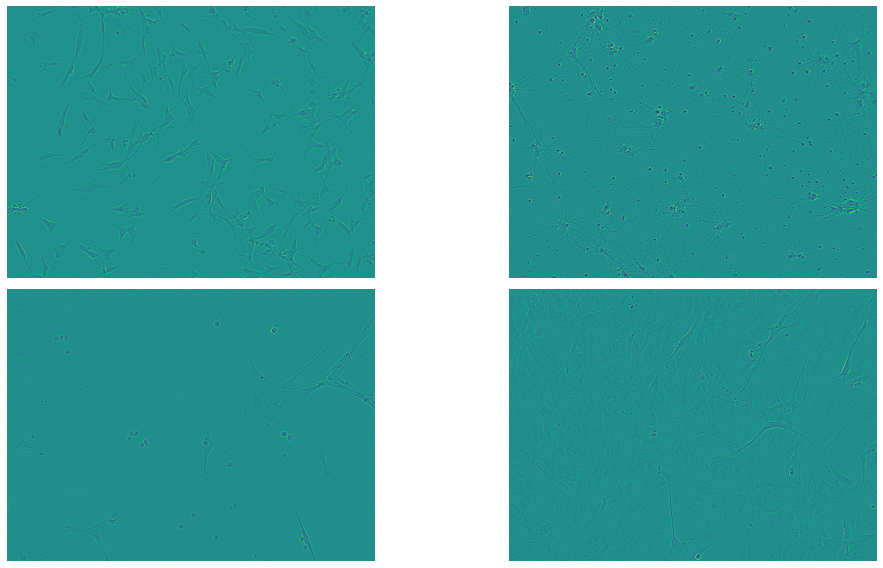

In [73]:
# Show list of images without annotations
display_multiple_img(train_images[:4], 2, 2)